In [5]:
import pandas as pd
import matplotlib.pyplot as plt

sim_df = pd.read_csv("video_simulation.csv")
hw_df = pd.read_csv("good_hardware_result.csv")
sim_df2 = pd.read_csv("simulation_rotating_past_object.csv")
hw_df2 = pd.read_csv("hardware_rotating_object.csv")


metrics = ["fitness", "forward", "turning", "collision"]
for m in metrics:
    sim_mean, sim_std = hw_df2[m].mean(), hw_df2[m].std()
    hw_mean, hw_std = hw_df[m].mean(), hw_df[m].std()
    print(f"{m}: Hw rot {sim_mean:.2f}±{sim_std:.2f} | non rotHW {hw_mean:.2f}±{hw_std:.2f}")



fitness: Hw rot 10.86±2.74 | non rotHW 19.46±12.95
forward: Hw rot 68.48±3.54 | non rotHW 55.49±29.69
turning: Hw rot 0.19±0.04 | non rotHW 0.45±0.13
collision: Hw rot 0.85±0.04 | non rotHW 0.81±0.13


In [2]:
import numpy as np

gap = {}
for col in ["left_action", "right_action", "fitness"]:
    sim_vals = sim_df[col].values
    hw_vals = hw_df[col].values
    # Compare distributions using mean absolute difference of normalized values
    sim_norm = (sim_vals - sim_vals.mean()) / sim_vals.std()
    hw_norm = (hw_vals - hw_vals.mean()) / hw_vals.std()
    gap[col] = np.mean(np.abs(sim_norm - hw_norm))

print("Reality gap score per metric:", gap)

Reality gap score per metric: {'left_action': 1.2849928470673455, 'right_action': 1.0785354168502854, 'fitness': 1.1397597372249328}


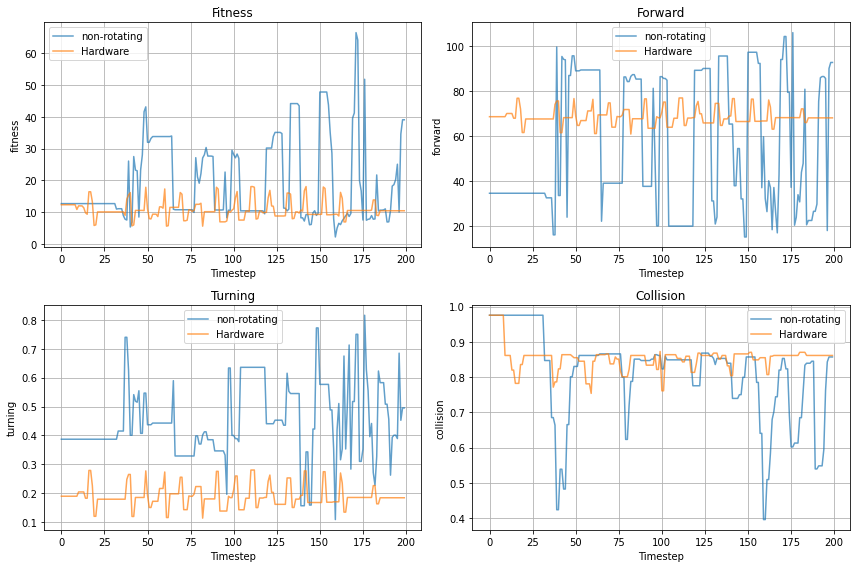

In [ ]:
# Set up a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    ax = axes[i]
    ax.plot(hw_df[metric].values, label="Circling hw", alpha=0.7)
    ax.plot(hw_df2[metric].values, label="Hardware", alpha=0.7)
    ax.set_title(metric.capitalize())
    ax.set_xlabel("Timestep")
    ax.set_ylabel(metric)
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()